This lab is a python adaptation of "Introduction to Statistical Learning with Applications in Python" by Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani, and Jonathan Taylor, updated by Adu Baffour at University of Missouri-Kansas City: Introduction to Statistical Learning (SC-5565).

# Import libraries

In [4]:
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

import seaborn as sns

# Dataset & Analysis

In [6]:
data = pd.read_csv('Hitters.csv')
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


First of all, we note that the `Salary` variable is missing for some of the
players. The `isnull()` function can be used to identify the missing observations. It returns a vector of the same length as the input vector, with a `TRUE` value
for any elements that are missing, and a `FALSE` value for non-missing elements.
The `sum()` function can then be used to count all of the missing elements:

In [7]:
print("Number of null values:", data.isnull().sum())

Number of null values: AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64


We see that `Salary` is missing for 59 players. The `dropna()` function
removes all of the rows that have missing values in any variable:

In [8]:
# Print the dimensions of the original Hitters data (322 rows x 20 columns)
print("Dimensions of original data:", data.shape)

# Drop any rows the contain missing values, along with the player names
data_clean = data.dropna()

# Print the dimensions of the modified Hitters data (263 rows x 20 columns)
print("Dimensions of modified data:", data_clean.shape)

# One last check: should return 0
print("Number of null values:", data_clean["Salary"].isnull().sum())

Dimensions of original data: (322, 20)
Dimensions of modified data: (263, 20)
Number of null values: 0


In [9]:
dummies = pd.get_dummies(data_clean[['League', 'Division', 'NewLeague']], dtype=int)
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [10]:
y = data_clean.Salary #salary is the response salary is quantitative which is a regression problem

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
data_clean = data_clean.drop(['League', 'Division', 'NewLeague'], axis=1)

# Define the feature set X.
data_clean = pd.concat([data_clean, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
data_clean.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


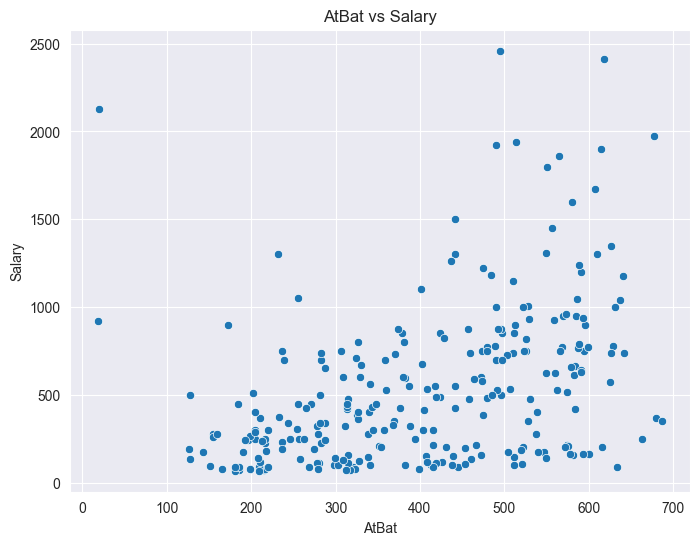

Correlation between AtBat and Salary: 0.39477094475973734


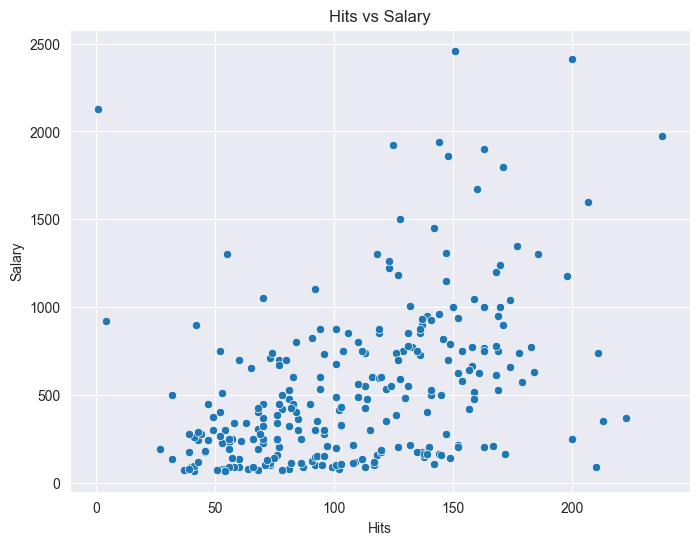

Correlation between Hits and Salary: 0.4386747378694112


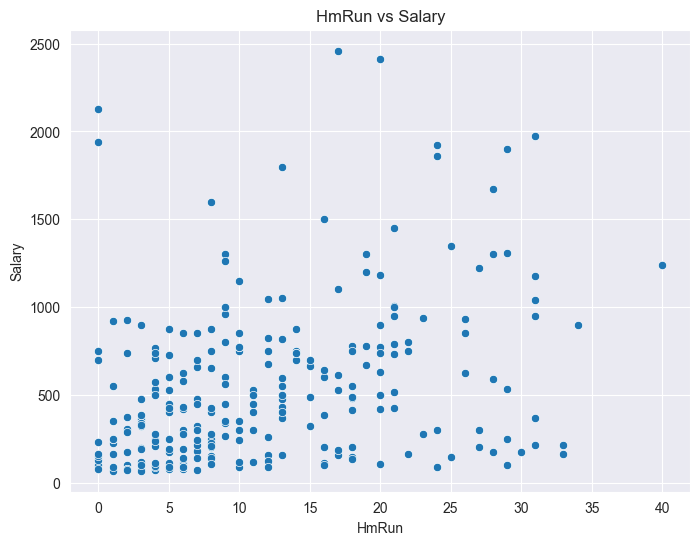

Correlation between HmRun and Salary: 0.34302807815466363


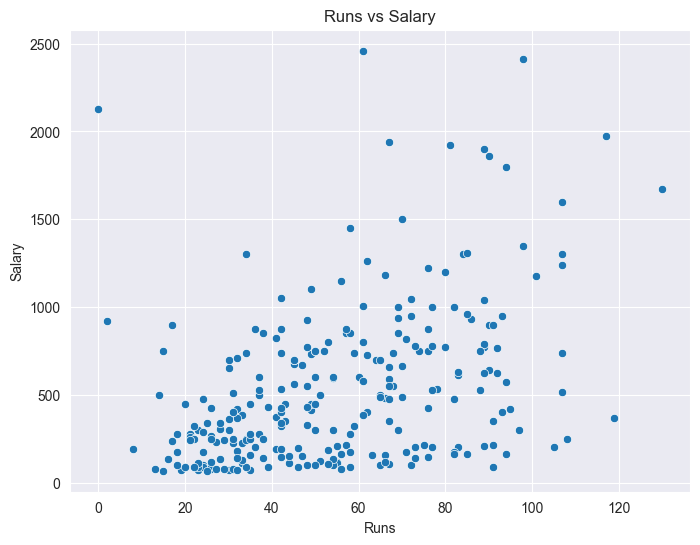

Correlation between Runs and Salary: 0.4198585593019815


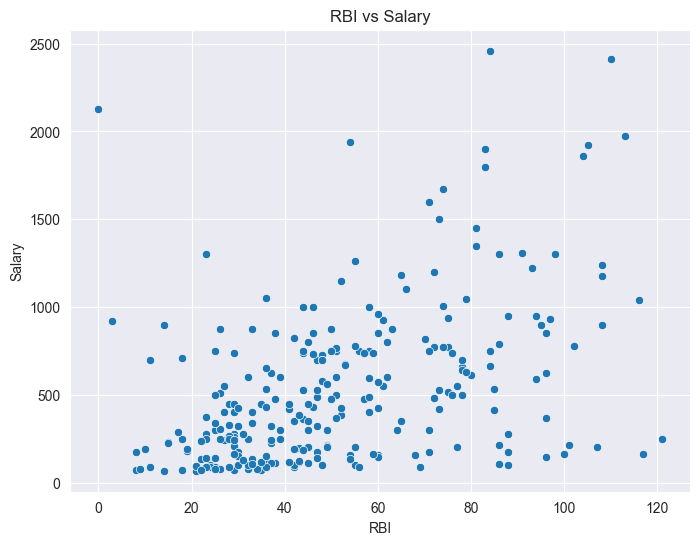

Correlation between RBI and Salary: 0.4494570879400337


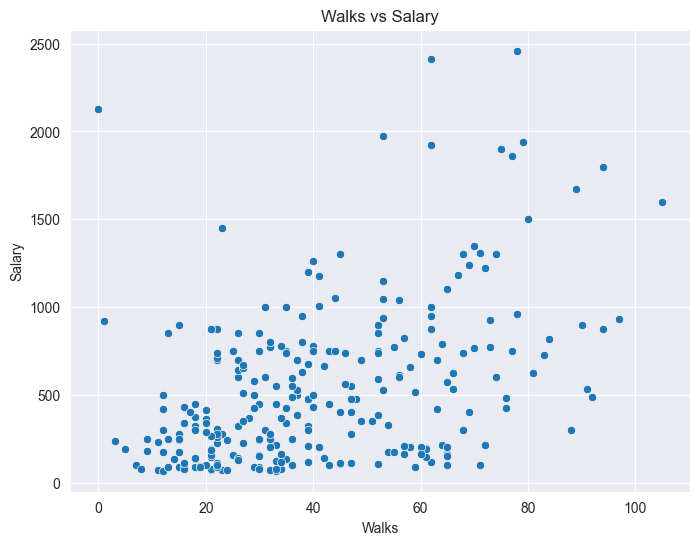

Correlation between Walks and Salary: 0.44386726016297945


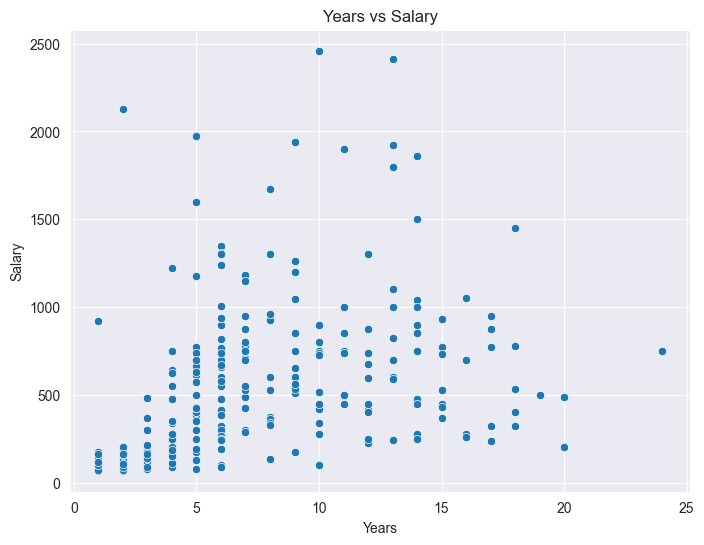

Correlation between Years and Salary: 0.40065699438268604


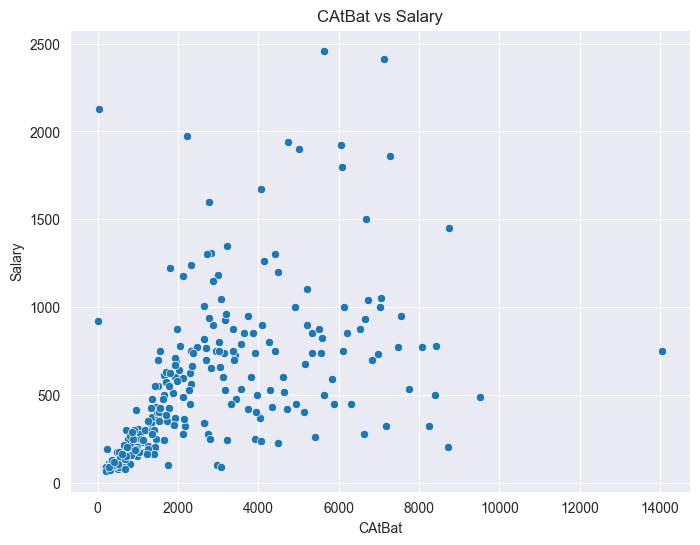

Correlation between CAtBat and Salary: 0.5261353096237892


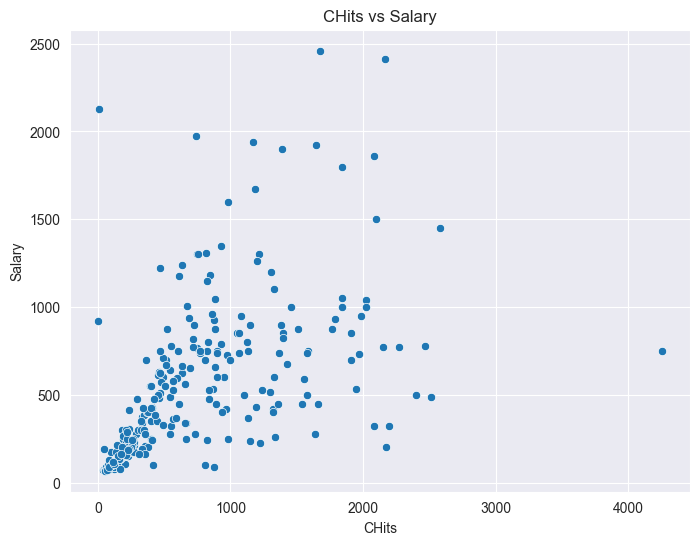

Correlation between CHits and Salary: 0.5489095590351705


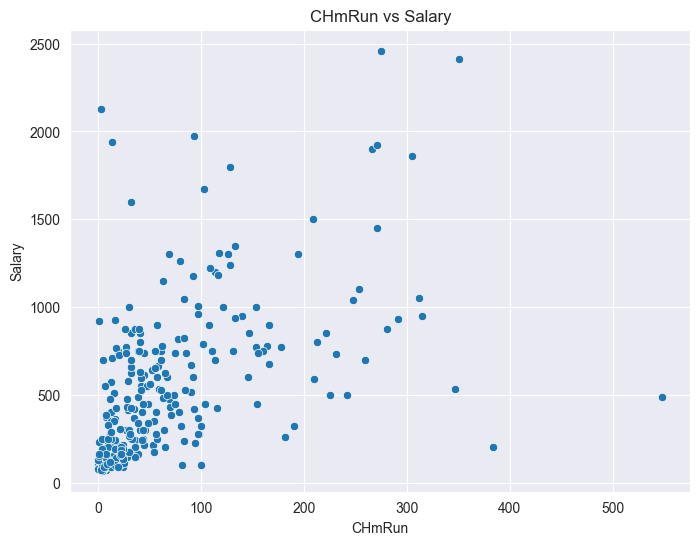

Correlation between CHmRun and Salary: 0.5249305595435935


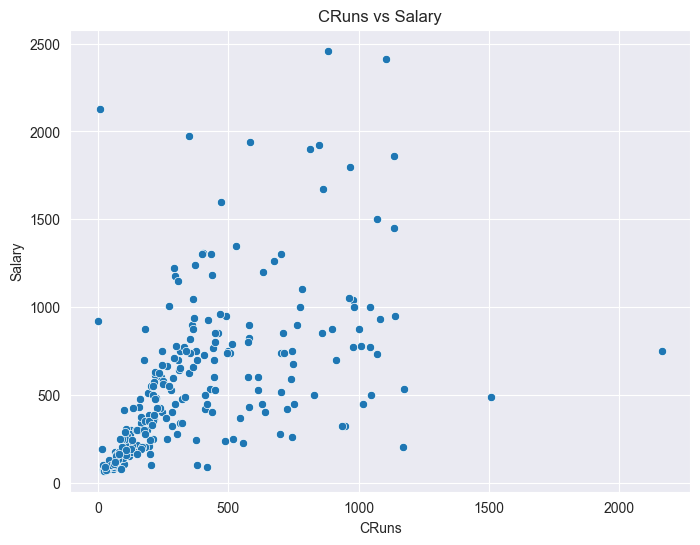

Correlation between CRuns and Salary: 0.5626777110048051


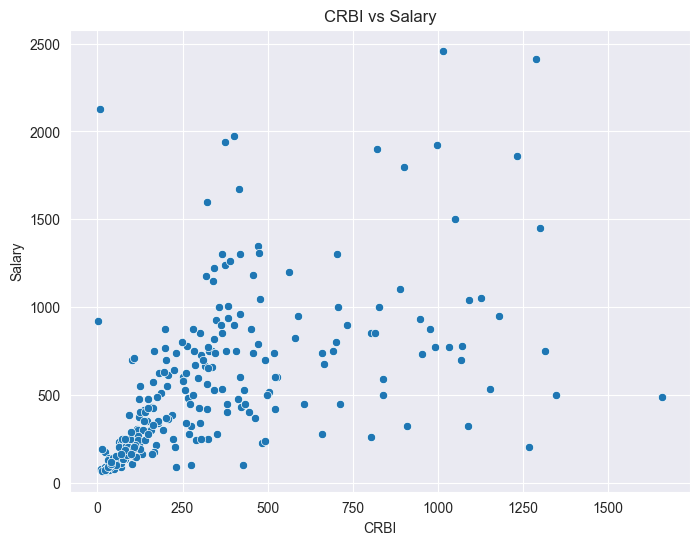

Correlation between CRBI and Salary: 0.5669656856176524


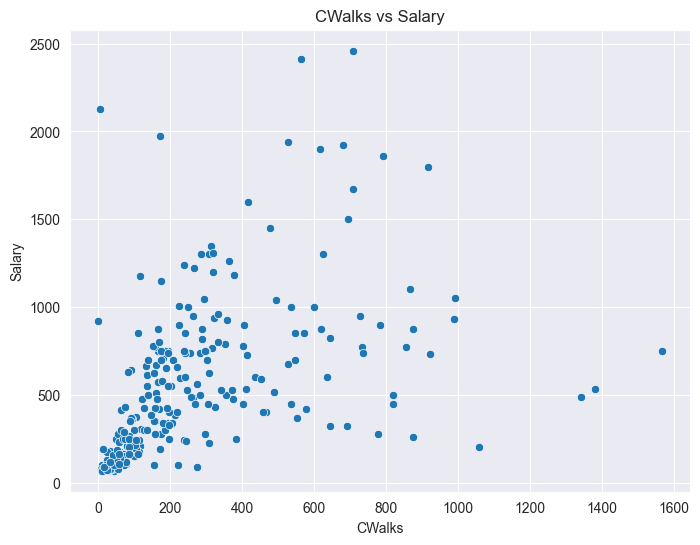

Correlation between CWalks and Salary: 0.48982203628068005


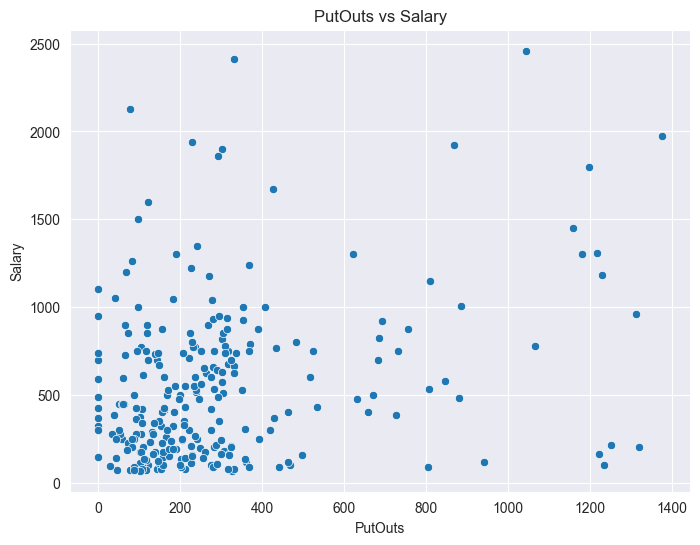

Correlation between PutOuts and Salary: 0.30048035550600516


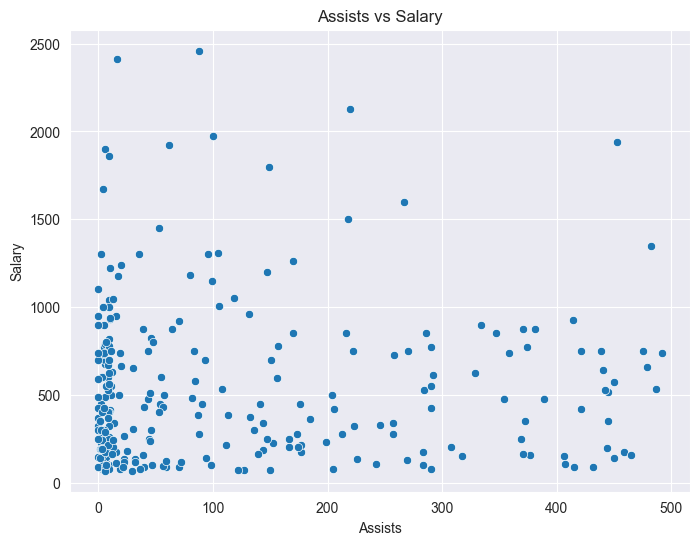

Correlation between Assists and Salary: 0.025436135647346703


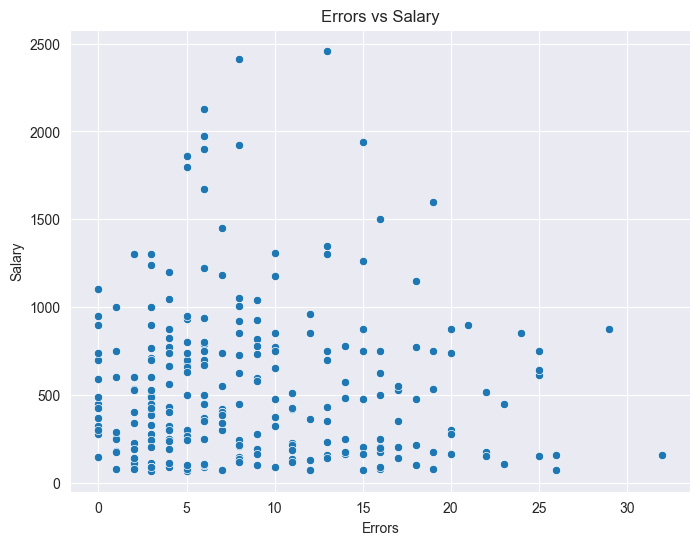

Correlation between Errors and Salary: -0.005400701500953135


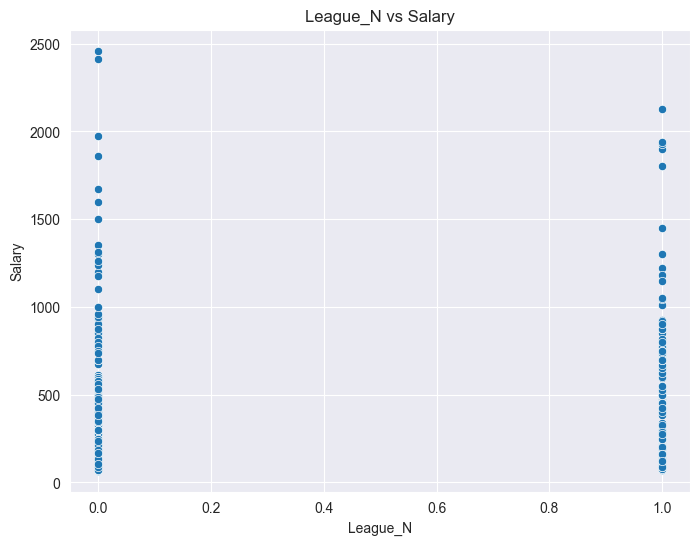

Correlation between League_N and Salary: -0.014281827480804624


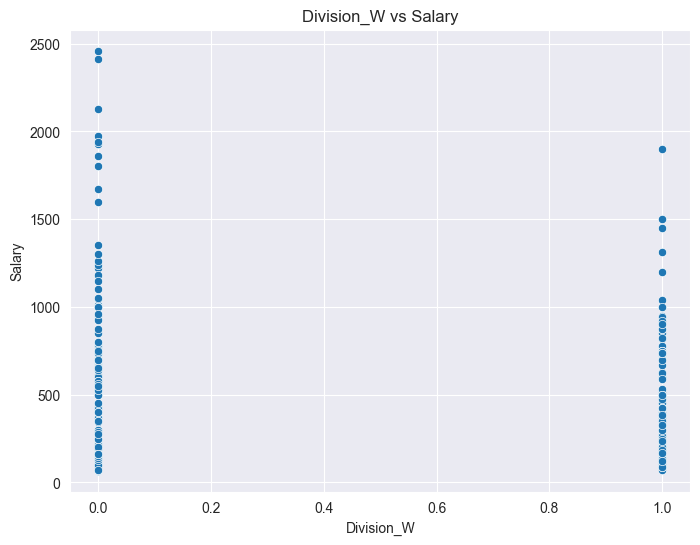

Correlation between Division_W and Salary: -0.19251439934624656


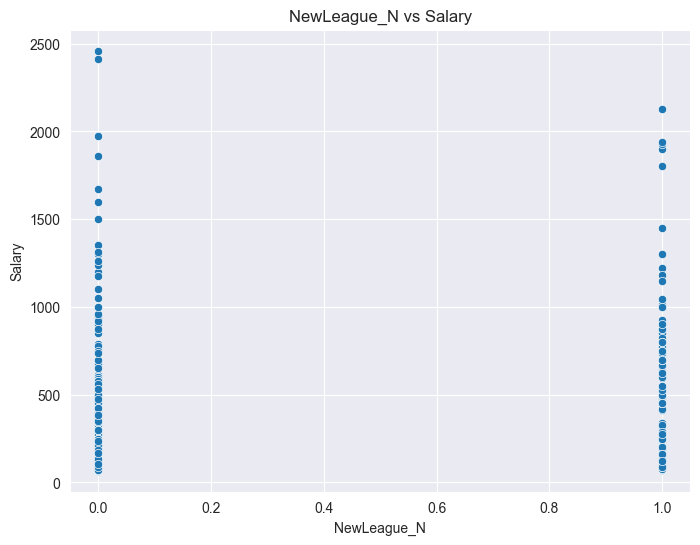

Correlation between NewLeague_N and Salary: -0.002834459651772635


In [11]:
# @title data analysis - medv

# def load_data(file_path):
#     """Load the dataset."""
#     return pd.read_csv(file_path)

def analyze_column(data, column, target_column):
    """Analyze a single column against the target."""
    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=column, y=target_column)
    plt.title(f'{column} vs {target_column}')
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()

    # Box plot
    # plt.figure(figsize=(8, 6))
    # sns.boxplot(data=data, x=target_column, y=column)
    # plt.title(f'{column} vs {target_column}')
    # plt.xlabel(target_column)
    # plt.ylabel(column)
    # plt.show()

    # # Histogram
    # plt.figure(figsize=(8, 6))
    # sns.histplot(data[column], kde=True)
    # plt.title(f'{column} Distribution')
    # plt.xlabel(column)
    # plt.ylabel('Frequency')
    # plt.show()

    # Correlation
    correlation = data[[column, target_column]].corr().iloc[0, 1]
    print(f'Correlation between {column} and {target_column}: {correlation}')


def analyze_all_columns(data, target_column):
    """Analyze all columns against the target."""
    feature_columns = [col for col in data.columns if col != target_column]
    for column in feature_columns:
        analyze_column(data, column, target_column)


target_column = 'Salary'
analyze_all_columns(data_clean, target_column)


In [20]:
X = data_clean.drop(['Salary'], axis=1).astype('float64')
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1.0,1.0,1.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0.0,1.0,0.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1.0,0.0,1.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1.0,0.0,1.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0.0,1.0,0.0


In [21]:
y = data_clean.Salary
y.head()

1    475.0
2    480.0
3    500.0
4     91.5
5    750.0
Name: Salary, dtype: float64

# Best Subset Selection

Here we apply the best subset selection approach to the Hitters data. We
wish to predict a baseball player’s Salary on the basis of various statistics
associated with performance in the previous year. Let's take a quick look:

We can perform best subset selection by identifying the best model that contains a given number of predictors, where **best** is quantified using RSS. We'll define a helper function to outputs the best set of variables for
each model size:

In [13]:
def processSubset(feature_set, X, y):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [19]:
def getBest(k, X, y):

    tic = time.time()

    results = []

    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo, X, y))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    return best_model

This returns a `DataFrame` containing the best model that we generated, along with some extra information about the model. Now we want to call that function for each number of predictors $k$:

In [23]:
# Could take quite a while to complete...

models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,7):
    models_best.loc[i] = getBest(i, X, y)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 19 models on 1 predictors in 0.03867912292480469 seconds.
Processed 171 models on 2 predictors in 0.24159669876098633 seconds.
Processed 969 models on 3 predictors in 1.378744125366211 seconds.
Processed 3876 models on 4 predictors in 5.166358947753906 seconds.
Processed 11628 models on 5 predictors in 17.65130925178528 seconds.
Processed 27132 models on 6 predictors in 40.713544845581055 seconds.
Total elapsed time: 65.66474771499634 seconds.


Now we have one big `DataFrame` that contains the best models we've generated along with their RSS:

In [24]:
models_best

,RSS,model
1,43213925.909868,<statsmodels.regression.linear_model.Regressio...
2,30733054.433644,<statsmodels.regression.linear_model.Regressio...
3,29410713.176731,<statsmodels.regression.linear_model.Regressio...
4,27976782.522603,<statsmodels.regression.linear_model.Regressio...
5,27187795.009508,<statsmodels.regression.linear_model.Regressio...
6,26397720.512772,<statsmodels.regression.linear_model.Regressio...


If we want to access the details of each model, no problem! We can get a full rundown of a single model using the `summary()` function:

In [26]:
print(models_best.loc[6, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.795
Model:                            OLS   Adj. R-squared (uncentered):              0.790
Method:                 Least Squares   F-statistic:                              166.3
Date:                Wed, 05 Mar 2025   Prob (F-statistic):                    1.79e-85
Time:                        16:45:26   Log-Likelihood:                         -1887.6
No. Observations:                 263   AIC:                                      3787.
Df Residuals:                     257   BIC:                                      3809.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

This output indicates that the best two-variable model
contains only `Hits` and `CRBI`. To save time, we only generated results
up to the best 7-variable model. You can use the functions we defined above to explore as many variables as are desired.

In [27]:
# Show the best 19-variable model
print(getBest(19, X, y)["model"].summary())

Processed 1 models on 19 predictors in 0.004759550094604492 seconds.
                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.795
Method:                 Least Squares   F-statistic:                              54.64
Date:                Wed, 05 Mar 2025   Prob (F-statistic):                    1.31e-76
Time:                        16:45:57   Log-Likelihood:                         -1877.9
No. Observations:                 263   AIC:                                      3794.
Df Residuals:                     244   BIC:                                      3862.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P

Rather than letting the results of our call to the `summary()` function print to the screen, we can access just the parts we need using the model's attributes. For example, if we want the $R^2$ value:

In [28]:
models_best.loc[2, "model"].rsquared

np.float64(0.7614950002332872)

Excellent! In addition to the verbose output we get when we print the summary to the screen, fitting the `OLM` also produced many other useful statistics such as adjusted $R^2$, AIC, and BIC. We can examine these to try to select the best overall model. Let's start by looking at $R^2$ across all our models:

In [29]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_best.apply(lambda row: row[1].rsquared, axis=1)

C:\Users\juliu\AppData\Local\Temp\ipykernel_12056\1269467771.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  models_best.apply(lambda row: row[1].rsquared, axis=1)


1    0.664637
2    0.761495
3    0.771757
4    0.782885
5    0.789008
6    0.795140
dtype: float64

As expected, the $R^2$ statistic increases monotonically as more
variables are included.

Plotting RSS, adjusted $R^2$, AIC, and BIC for all of the models at once will
help us decide which model to select. Note the `type="l"` option tells `R` to
connect the plotted points with lines:

C:\Users\juliu\AppData\Local\Temp\ipykernel_12056\3378322677.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)


Text(0, 0.5, 'adjusted rsquared')

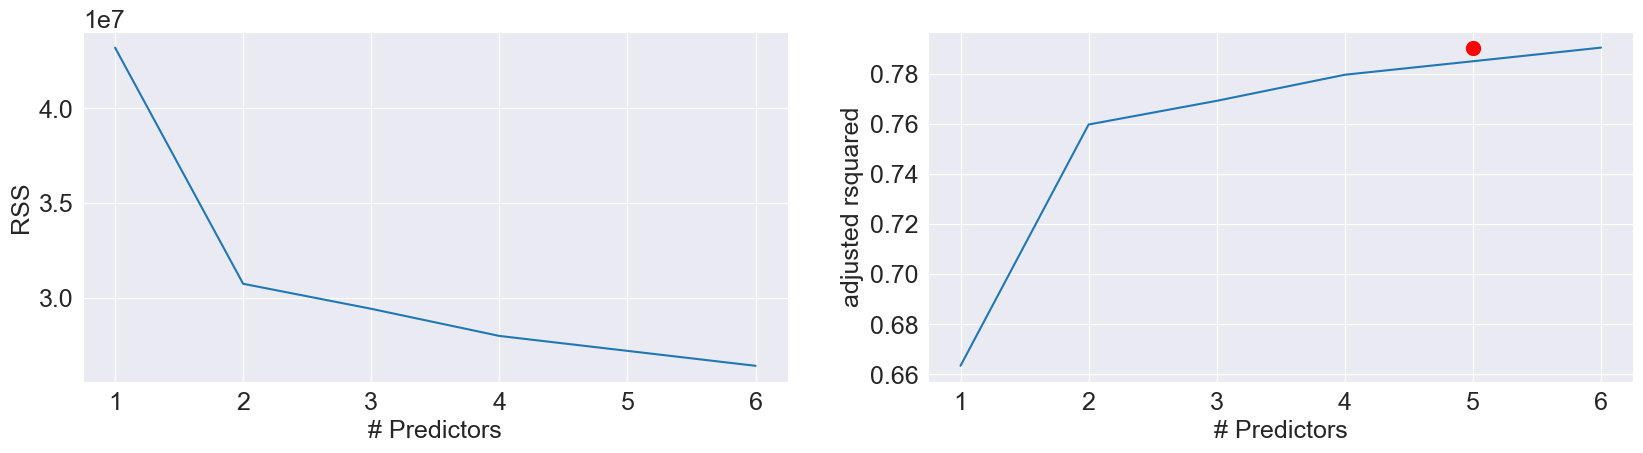

In [31]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_best["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
# aic = models_best.apply(lambda row: row[1].aic, axis=1)

# plt.subplot(2, 2, 3)
# plt.plot(aic)
# plt.plot(aic.argmin(), aic.min(), "or")
# plt.xlabel('# Predictors')
# plt.ylabel('AIC')

# bic = models_best.apply(lambda row: row[1].bic, axis=1)

# plt.subplot(2, 2, 4)
# plt.plot(bic)
# plt.plot(bic.argmin(), bic.min(), "or")
# plt.xlabel('# Predictors')
# plt.ylabel('BIC')

Recall that in the second step of our selection process, we narrowed the field down to just one model on any $k<=p$ predictors. We see that according to BIC, the best performer is the model with 6 variables. According to AIC and adjusted $R^2$ something a bit more complex might be better. Again, no one measure is going to give us an entirely accurate picture... but they all agree that a model with 5 or fewer predictors is insufficient.

# 6.5.2 Forward and Backward Stepwise Selection
We can also use a similar approach to perform forward stepwise
or backward stepwise selection, using a slight modification of the functions we defined above:

In [39]:
def forward(predictors, X, y):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]

    tic = time.time()

    results = []

    for p in remaining_predictors:
        results.append(processSubset(predictors+[p], X, y))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    return best_model

Now let's see how much faster it runs!

In [41]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X.columns)+1):
    models_fwd.loc[i] = forward(predictors, X, y)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  19 models on 1 predictors in 0.07167172431945801 seconds.
Processed  18 models on 2 predictors in 0.034293413162231445 seconds.
Processed  17 models on 3 predictors in 0.05788540840148926 seconds.
Processed  16 models on 4 predictors in 0.03421330451965332 seconds.
Processed  15 models on 5 predictors in 0.0417323112487793 seconds.
Processed  14 models on 6 predictors in 0.06239748001098633 seconds.
Processed  13 models on 7 predictors in 0.07771754264831543 seconds.
Processed  12 models on 8 predictors in 0.06695127487182617 seconds.
Processed  11 models on 9 predictors in 0.07124543190002441 seconds.
Processed  10 models on 10 predictors in 0.05320024490356445 seconds.
Processed  9 models on 11 predictors in 0.025816917419433594 seconds.
Processed  8 models on 12 predictors in 0.01970815658569336 seconds.
Processed  7 models on 13 predictors in 0.018604040145874023 seconds.
Processed  6 models on 14 predictors in 0.017569541931152344 seconds.
Processed  5 models on 15 pred

Phew! That's a lot better. Let's take a look:

In [42]:
print(models_fwd.loc[1, "model"].summary())
print(models_fwd.loc[2, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.665
Model:                            OLS   Adj. R-squared (uncentered):              0.663
Method:                 Least Squares   F-statistic:                              519.2
Date:                Wed, 05 Mar 2025   Prob (F-statistic):                    4.20e-64
Time:                        16:51:01   Log-Likelihood:                         -1952.4
No. Observations:                 263   AIC:                                      3907.
Df Residuals:                     262   BIC:                                      3910.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

We see that using forward stepwise selection, the best one-variable
model contains only `Hits`, and the best two-variable model additionally
includes `CRBI`. Let's see how the models stack up against best subset selection:

In [43]:
print(models_best.loc[6, "model"].summary())
print(models_fwd.loc[6, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.795
Model:                            OLS   Adj. R-squared (uncentered):              0.790
Method:                 Least Squares   F-statistic:                              166.3
Date:                Wed, 05 Mar 2025   Prob (F-statistic):                    1.79e-85
Time:                        16:51:57   Log-Likelihood:                         -1887.6
No. Observations:                 263   AIC:                                      3787.
Df Residuals:                     257   BIC:                                      3809.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

For this data, the best one-variable through six-variable
models are each identical for best subset and forward selection.

# Backward Selection
Not much has to change to implement backward selection... just looping through the predictors in reverse!

In [45]:
def backward(predictors, X, y):

    tic = time.time()

    results = []

    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo, X, y))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    return best_model

In [46]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X.columns)))

tic = time.time()
predictors = X.columns

while(len(predictors) > 1):
    models_bwd.loc[len(predictors)-1] = backward(predictors, X, y)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  19 models on 18 predictors in 0.053643226623535156 seconds.
Processed  18 models on 17 predictors in 0.03859090805053711 seconds.
Processed  17 models on 16 predictors in 0.027716636657714844 seconds.
Processed  16 models on 15 predictors in 0.024509668350219727 seconds.
Processed  15 models on 14 predictors in 0.023085594177246094 seconds.
Processed  14 models on 13 predictors in 0.023026704788208008 seconds.
Processed  13 models on 12 predictors in 0.02526116371154785 seconds.
Processed  12 models on 11 predictors in 0.019354581832885742 seconds.
Processed  11 models on 10 predictors in 0.017083168029785156 seconds.
Processed  10 models on 9 predictors in 0.02519822120666504 seconds.
Processed  9 models on 8 predictors in 0.02060413360595703 seconds.
Processed  8 models on 7 predictors in 0.018652677536010742 seconds.
Processed  7 models on 6 predictors in 0.021102190017700195 seconds.
Processed  6 models on 5 predictors in 0.014063119888305664 seconds.
Processed  5 models

For this data, the best one-variable through six-variable
models are each identical for best subset and forward selection.
However, the best seven-variable models identified by forward stepwise selection,
backward stepwise selection, and best subset selection are different:

In [48]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[6, "model"].params)

------------
Best Subset:
------------
AtBat          -1.548829
Hits            7.019007
Walks           3.751336
CRBI            0.654416
PutOuts         0.270287
Division_W   -104.451269
dtype: float64


In [49]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[6, "model"].params)

-----------------
Foward Selection:
-----------------
Hits            7.019007
CRBI            0.654416
Division_W   -104.451269
PutOuts         0.270287
AtBat          -1.548829
Walks           3.751336
dtype: float64


In [50]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[6, "model"].params)

-------------------
Backward Selection:
-------------------
AtBat         -1.542768
Hits           6.855653
Walks          3.545354
CRuns          0.630157
PutOuts        0.305303
Division_W   -97.917200
dtype: float64


# Getting credit
To get credit for this lab, please state an example where you would choose to use each of the following:
- Best  : It best to use it when you have a dataset with small number of predictors
- Forward selection : when you have large number of predictors in a dataset like family history of lung cancer
- Backward selection: it best used when you have many features in dataset like  finding the number of rooms in an apartment buildiing
- validation-set
- k-fold